In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from __future__ import print_function
import numpy as np
#from tqdm import tqdm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import cm
plt.rcParams.update({'font.size': 14, 'lines.markersize' : 4})
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import sys, os
import time, datetime
from datetime import timedelta
import pandas as pd
sys.path.append('/reg/neh/home/tdd14/modules/cart2pol/cart2pol')
import cart2pol
from cart2pol import PolarRebin
from torchrecon_funcs_cal import *

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
my_cmap = cm.get_cmap('jet')
xr = np.linspace(0, 1, 2000)
my_cmap = my_cmap(xr)
my_cmap[0:2,-1] = 0
my_cmap = ListedColormap(my_cmap)

In [6]:
def gaus(x, a, mu, sig):
    return a*1/sig/np.sqrt(2*np.pi)*np.exp(-0.5*((x-mu)/sig)**2)


def gaus_fit(t,spec):
    #spec = Et*Et.conj()
    popt, pcov = curve_fit(gaus,t,spec, bounds=([0.1, -50, 0.01], [100, 50, 30]))
    a, mu, sig = popt
    return a, mu, sig #FWHM is 2.355*sig


In [7]:
def FWHM(t, spec): 
    peakMax = np.max(spec)
    indMax = np.where(spec == peakMax)[0] #should be center since rolled
    if len(indMax)>1: indMax = np.max(indMax)
    t1 = 0
    t2 = 0
    
    for i in range(int(len(t)/2)):
        if t2 != 0 and t1 != 0:
            break
        if i < indMax: 
            if spec[i] >= 0.5*peakMax and t1 == 0:
                t1 = t[i]
            if spec[-i] >= 0.5*peakMax and t2 == 0:
                t2 = t[-i]  
    return t2-t1

In [8]:
def FWHM2(t, spec): 
    spec = spec/np.sum(spec)
    peakMax = np.max(spec)
    indMax = np.where(spec == peakMax)[0] 
    if len(indMax)>1: indMax = np.max(indMax)
    else: indMax = indMax[0]
    t1 = 0
    t2 = 0
    ind1 = 0
    ind2 = 0
    
    for i in range(int(len(t))):
        if t2 != 0 and t1 != 0:
            break
        if i < indMax:
            #print(i, np.trapz(spec[-i:]))
            
            if (np.trapz(spec[:i]) >= 0.25) & (t1 == 0):
                t1 = t[i]
                ind1 = i
            elif (np.trapz(spec[-(i+1):]) >= 0.25) & (t2 == 0):
                t2 = t[-(i+1)]  
                ind2 = -(i+1)
    return t2-t1 #, ind1, ind2

In [9]:
#basesdir = '/reg/d/psdm/tmo/tmox51020/results/paris/circularpol_vNbases_dipole_K5/'
basesdir = '/reg/d/psdm/tmo/tmox51020/results/paris/circularpol_vNbases_dipole_Feb/'
PR = PolarRebin('/reg/d/psdm/tmo/tmox51020/results/paris/recon/PR_c32_r32_th32.h5') 


In [10]:
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jan9_hole_noQ_cal_spec_eshift.npy' #run112 extended Up
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb20_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar2_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar3_112_bighole.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar3_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar6_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar6_112+1eV.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar9_112.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar10_110.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar12_112.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar13_121.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar14_121.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar19_124.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar17_123.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar20_123.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar25_127.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar23_125.npy'

#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_May31_127.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar6_112-1eV.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jan19_hole_noQ_cal_spec_eshift_2.npy' #run110
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb1_116.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb2_117.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb3_110.npy'
# fname= '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb13_0.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jun1_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jun15_unstreaked_dw0_nohole.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jun15_unstreaked_dw0_medhole.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jun15_unstreaked_dw0_hole.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jun15_unstreaked_dw0_Lhole.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul5_unstreaked_dw0.npy'
dats = np.load(fname, allow_pickle = True)[()]

In [11]:
dats.keys()

dict_keys(['dat', 'mask', 'maskhm', 'mdatname', 'specdatname', 'gfsig', 'sc', 'thresh'])

In [12]:
dat = dats['dat']
mask = dats['mask']
maskhm = dats['maskhm']
mdatname = dats['mdatname']
specdatname = dats['specdatname']
gfsig = dats['gfsig']
#eshift = dats['eshift']
sc = dats['sc']
gfcart = 0.25
thresh = dats['thresh'] #0.0005
print(mdatname)

/cds/home/p/paris/reconVMI_clean/recon X510 Dec/Ms_Jul5_unstreaked127.npy


In [13]:
mdat= np.load(mdatname , allow_pickle = True)[()]
specdat = np.load(specdatname, allow_pickle = True)[()]
#gds = np.load(mdatname.split('Ms')[-0]+'GDs'+mdatname.split('Ms')[-1],allow_pickle=True)[()]

In [14]:
Ups = np.unique(dat['Up'])
Ups = [int(np.unique(dat['Up']))]
print(Ups)

[0]


In [15]:
Bps = []
alphas = []
vNaxiss = []
alphaws = []
N_w = 6
N_t = 6
Nb = N_w*N_t
for i in range(len(Ups)):
    Np = 128
    Up = Ups[i]  
    filename = 'Bpbasis_Np' + str(Np) + '_Nw' + str(N_w) +'_Nt' + str(N_t) + '_Up' + str(Up)+'.npy'
    print(filename)
    br = np.load(basesdir+filename, allow_pickle=True)
    Breal = br[()]['Breal']
    Bimag = br[()]['Bimag']
    breal = br[()]['breal']
    bimag = br[()]['bimag']
    vNaxis = br[()]['vNaxis']
    alpha = br[()]['alpha']

    
    tempr = np.zeros((Breal.shape[0], 64**2))
    tempi = np.zeros((Breal.shape[0], 64**2))
    for i in range(len(Breal)):
        tempr[i,:] = np.reshape(rebin(np.reshape(Breal[i,:], [128,128])), [64**2])
        tempi[i,:] = np.reshape(rebin(np.reshape(Bimag[i,:], [128,128])), [64**2])

    Breal = tempr
    Bimag = tempi

    alphw = np.zeros(alpha['t_sample'].shape, dtype = complex)
    for i in range(len(alphw)):
        f = interp1d(vNaxis['t_sample'], alpha['t_sample'][i], fill_value = 0, bounds_error = False)
        N = 2801 #1024
        ts = np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], N)
        alphw[i] = np.fft.ifftshift(np.fft.ifft(f(ts)))

    Np = 64
    for j in range(Breal.shape[0]):
        temp=np.reshape(Breal[j,:],[Np,Np])
        polimg = PR.cart2pol(temp,32,32)
        bb = np.zeros((64,64))
        bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
        Breal[j,:]=np.reshape(bb,newshape=(1,Np**2))
        #temp=scimg.filters.gaussian_filter(temp,0.8889)
        #Bpr[j,:]=Variable(Tensor(np.reshape(temp,newshape=(1,Np**2))))
        temp=np.reshape(Bimag[j,:],[Np,Np])
        polimg = PR.cart2pol(temp,32,32)
        bb = np.zeros((64,64))
        bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
        Bimag[j,:]=np.reshape(bb,newshape=(1,Np**2))
        #temp=scimg.filters.gaussian_filter(temp,0.8889)
        #Bpi[j,:]=Variable(Tensor(np.reshape(temp,newshape=(1,Np**2))))

    Bp_basis = Breal+1j*Bimag

    Bps.append(Bp_basis)
    alphas.append(alpha)
    vNaxiss.append(vNaxis)
    alphaws.append(alphw)

Bpbasis_Np128_Nw6_Nt6_Up0.npy


In [16]:
thresh = 0.0002

[1.175352931022644, 1.1835598200559616, 1.1952850967645645, 1.20327927172184, 1.2844185531139374]


IndexError: index 1 is out of bounds for axis 0 with size 1

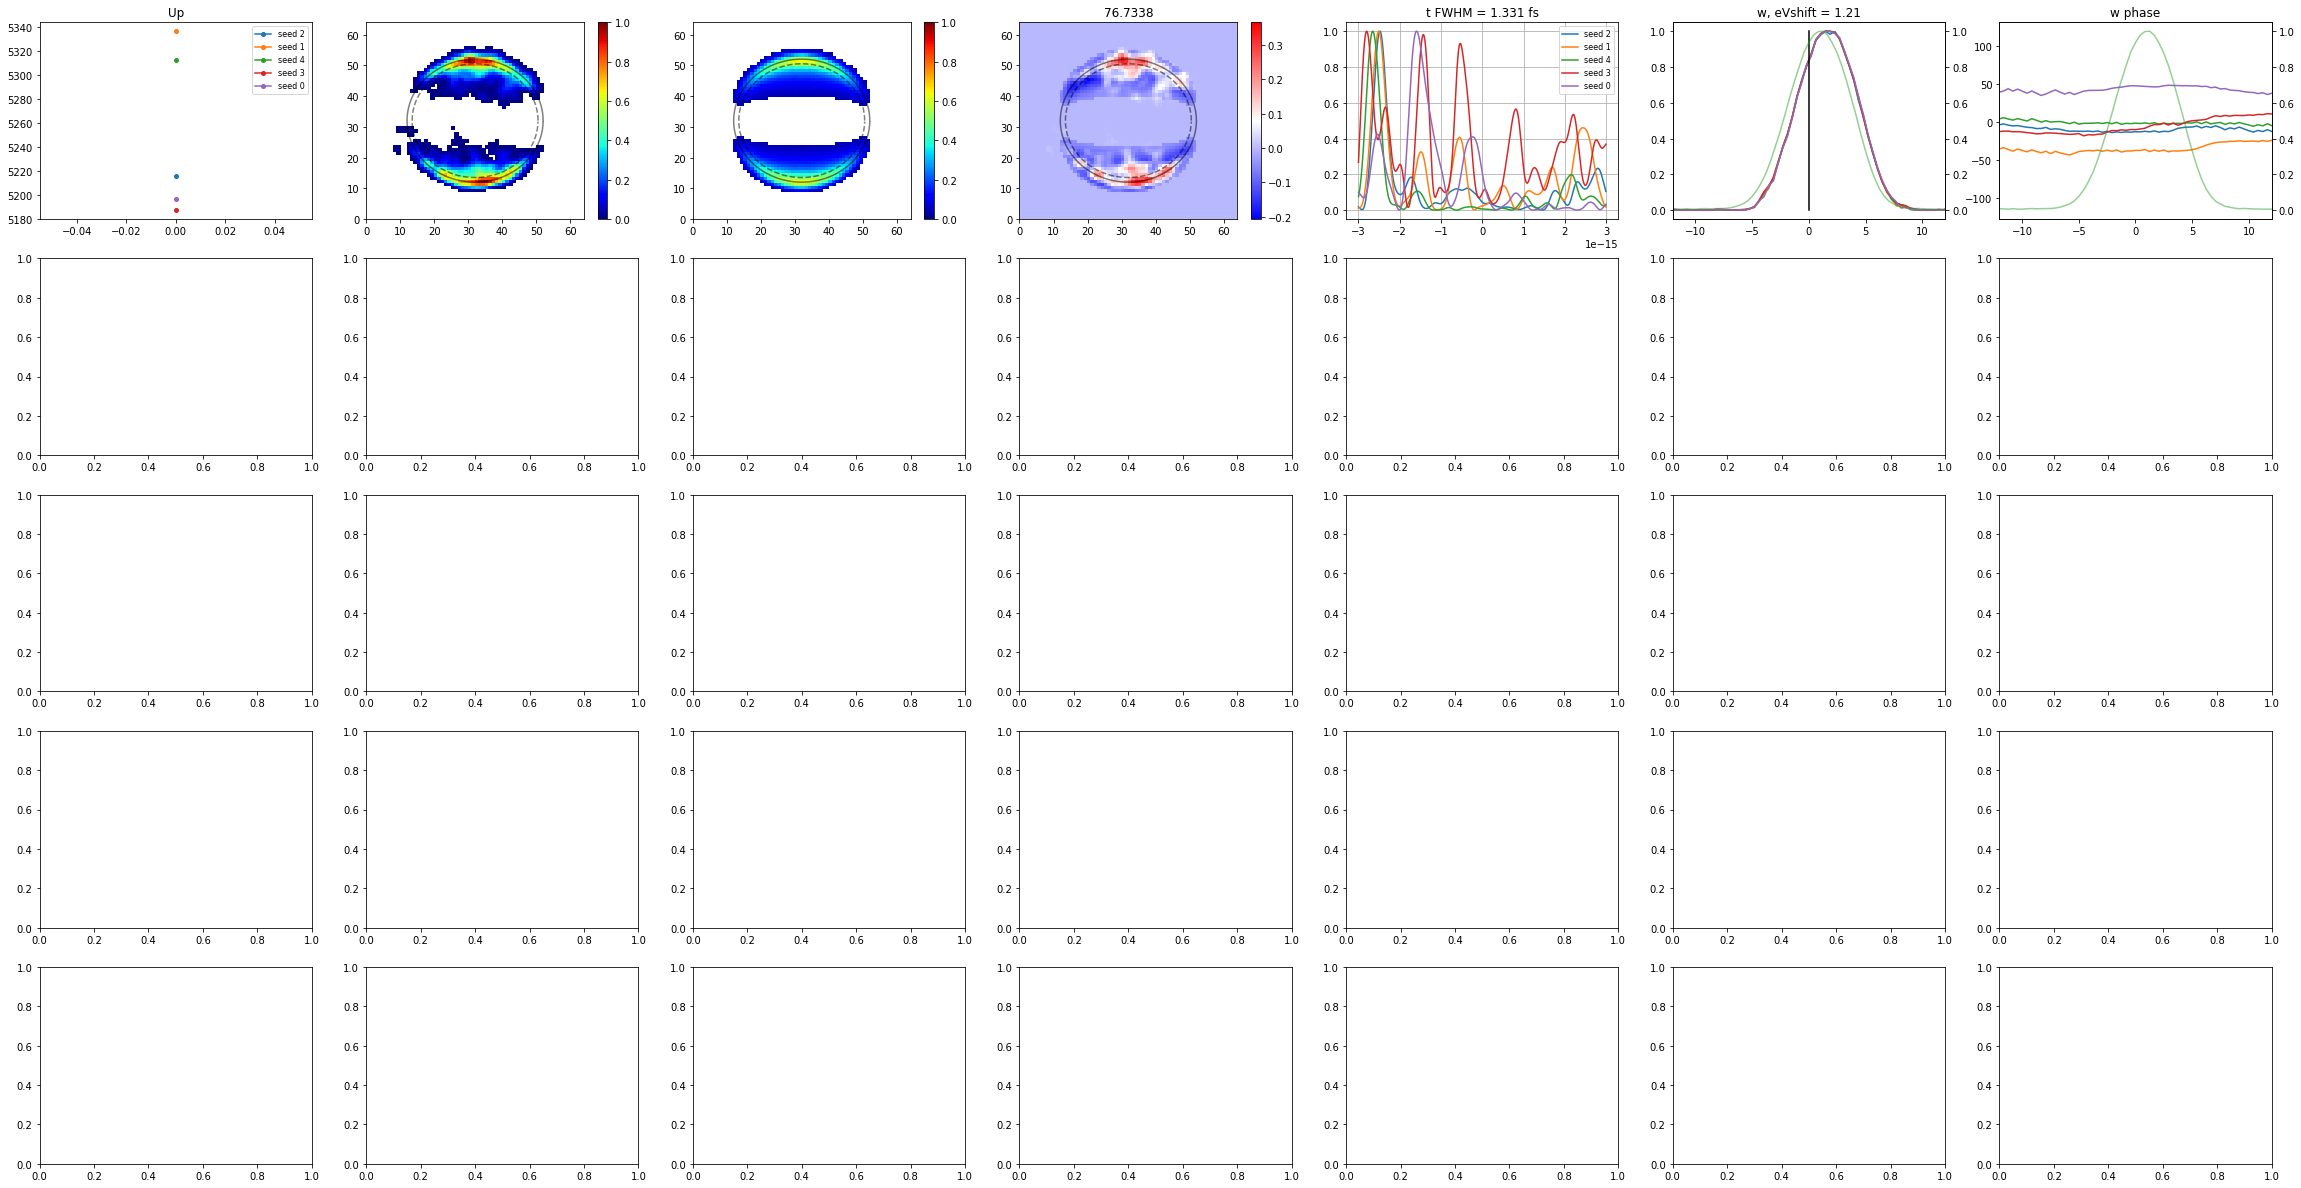

In [18]:
#plot for ppt
fwhms = []
std_t = []
ups_b = []
fwhms_avg = []
fwhms_maxs = []
fwhms2_maxs = []
eshift = 0 #np.unique(dat['eshift'])
IDs = np.unique(dat['ID'])
thresh = dats['thresh']
wr = 1200 #1340
for k in range(int(np.ceil(len(IDs)/5))):
    fig,axs = plt.subplots(nrows = 5, ncols =7, figsize = (40,21))
    for l in range(5):
        uplook = dat[(dat['ID'] == IDs[k*5+l])]['Up'][np.argmin(dat[(dat['ID'] == IDs[k*5+l])]['costs'][:,-1])]
        u = int(np.where(Ups == uplook)[0])
        seed_order = np.argsort(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['costs'][:,-1])
        seeds = np.unique(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['seed'])
        #seed_order = np.arange(len(seeds))
        duration = []
        ets = []
        shifts = []
        
        for ss in range(len(seeds)):   
        
            x = dat[(dat['ID'] == IDs[k*5+l])&(dat['seed'] == seeds[seed_order[ss]])]['Up']
            y= dat[(dat['ID'] == IDs[k*5+l])&(dat['seed'] == seeds[seed_order[ss]])]['costs'][:,-1]
            #y= dat[(dat['ID'] == IDs[k])]['costM'][:,-1]
            axs[l][0].plot(x[np.argsort(x)], y[np.argsort(x)], '-o', label = 'seed %1.0f' %seeds[seed_order[ss]])
            
            if ss == len(seeds)-1:
                axs[l][0].set_title('Up')
                axs[l][0].legend(fontsize = 8)
        
        
        Bp = Bps[u]
        vNaxis = vNaxiss[u]
        alpha = alphas[u]
        alphw = alphaws[u]
        ts= vNaxis['t_sample']
        
        t1 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][0])**2) 
        t2 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][-1])**2)


        m = mdat[IDs[k*5+l]]
        spec = specdat[IDs[k*5+l]]
        #spec = np.roll(spec,30)
        m = m/np.sum(m)
        N = 2801
        xf = np.arange(-N/2-1/2,N/2-1/2,1)/np.abs(vNaxis['t_sample'][0])/2
       # xf = np.arange(-N/2+1/2,N/2+1/2,1)/((vNaxis['t_sample'][-1] - vNaxis['t_sample'][0])) #using tsample range
        eV = 1239.84*(2*np.pi*xf)/2.9979E8/(2*np.pi)*1e-9 
        #Interpolate spec outside of the loop to match eV
        xeV = pix_2_eV(np.arange(1024), pixpereV = 22, spectra_hw0 = 0, spectra_pix0 = 512)
        xeV = xeV - eshift#3 #know this from previous calibration

        for s in range(len(seeds)):
            
            if len(seeds)>1:
                Q = np.squeeze(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['Qs'][seeds[seed_order[s]],:])
            else:
                Q = np.squeeze(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['Qs'])
            N_basis = 36
            eVshift_idx = 0
            Q1=Q[0:N_basis]
            Q1=np.reshape(Q1,[1,N_basis])
            Q2=np.concatenate(([0],Q[N_basis:2*N_basis-1]))
            Q2=np.reshape(Q2,[1,N_basis])
            Qguess=Q1+1j*Q2
            Qguess=np.reshape(Qguess,[N_basis,1])
            eVshift = Q[-1]
            eVshift=eVshift*10
            shifts.append(eVshift)

        #     if eVshift>25: 
        #         eVshift=25#25 is found empirically
        #     if eVshift<-25:
        #         eVshift=-25
            spec = specdat[IDs[k*5+l]]
            g = interp1d(np.arange(len(spec)),spec,bounds_error=False, fill_value = 0)
            spec=g((np.arange(len(spec))-eVshift))
            
            Mgr=np.real(np.matmul(np.matmul(Qguess,Qguess.conj().transpose()).transpose().flatten(),Bp))
            Mgr=Mgr/np.sum(Mgr)
            Mgr[Mgr<thresh] = 0
            Mgr=Mgr/np.sum(Mgr)

            alpha_t = alpha['t_sample']/np.max(np.abs(alpha['t_sample'])) ##take out carrier
            #alpha_t = alpha['t']/np.max(np.abs(alpha['t'])) #alpha_t = alpha_t*np.exp(-1.j*(energy_x)/hbar*np.tile(vNaxis['t'],(N_basis,1)))
            Et = np.squeeze(np.matmul(Qguess.T,alpha_t))
            
            f = interp1d(vNaxis['t_sample'],Et, fill_value = 0, bounds_error = False)
            Et_l = f(np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], len(vNaxis['t_sample'])))
            aghh = np.argmax(np.abs(Et_l))
            Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et_l,-aghh))) #need this to get imag part, must be evenly spaced
            #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
            EwEw = np.real(Ew*Ew.conj())
            EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
            EwEw = EwEw/np.max(EwEw)
            wphase = np.unwrap(np.angle(Ew))
            wphase = wphase - np.mean(wphase)
            Ew = np.squeeze(np.matmul(Qguess.T,alphw)) 
            EwEw = np.real(Ew*Ew.conj())
            EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
            EwEw = EwEw/np.max(EwEw)


#             aghh = np.argmax(np.abs(Et))
#             Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et,-aghh))) #need this to get imag part
#             #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
#             EwEw = np.real(Ew*Ew.conj())
#             EwEw = EwEw[1340-eVshift_idx:-1340-eVshift_idx]
#             EwEw = EwEw/np.max(EwEw)
#             wphase = np.unwrap(np.angle(Ew))
#             wphase = wphase - np.mean(wphase)

            phis = np.linspace(0,359,100)*np.pi/180
            if s == 0:

                pscale = 1/np.max(m/np.sum(m*mask))
                Mt = m/np.sum(m*mask)*pscale
                Mp = pscale*np.reshape(Mgr/np.sum(mask*np.reshape(Mgr, [64,64])), [64,64])
                #Mp = Mp/np.max(Mp)
                #tosave[str(k) + '_Q'] = Q
                #tosave[str(k) + '_Up'] = uplook
                p =axs[l][1].pcolormesh(Mt, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))
                axs[l][1].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
                axs[l][1].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
                plt.colorbar(p, ax = axs[l][1])
                #axs[l][1].set_title(str(IDs[k*5+l])+', '+str(uplook)+', GMD = %1.0f uJ' %(1000*gds[IDs[k*5+l]]))
                ups_b.append(uplook)

                p =axs[l][2].pcolormesh(Mp, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))#, vmin = np.min(m), vmax = np.max(m))
                plt.colorbar(p, ax = axs[l][2])
                phis = np.linspace(0,359,100)*np.pi/180
                axs[l][2].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
                axs[l][2].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)

                p = axs[l][3].pcolormesh((Mt-Mp)*mask, cmap = 'bwr')
                axs[l][3].set_title('%1.4f' %np.sum(np.abs(Mt-Mp)*mask))
                #p = axs[2].pcolormesh(m-np.reshape(Mgr, [64,64]), cmap = 'bwr')
                axs[l][3].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
                axs[l][3].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
                plt.colorbar(p, ax = axs[l][3])

                f = interp1d(xeV,spec, bounds_error=False, fill_value = 0)
                spec_in = f(eV[wr:-wr])
                ############# spec cal
                xxx1 = np.arange(len(spec_in))
                f = interp1d(xxx1, spec_in, fill_value = 0, bounds_error = False)
                xs = np.linspace((xxx1[0] -np.argmax(spec_in)), (xxx1[-1]-np.argmax(spec_in)), len(xxx1))+np.argmax(spec_in)
                spec_in = f(xs)
                #########

                spec_in=spec_in/np.max(spec_in)
                ax1 = axs[l][6].twinx()
                ax1.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)
                ax = axs[l][5].twinx()
                ax.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)


            
            #axs[l][4].set_title('t')
            axs[l][5].plot(np.linspace(eV[wr],eV[-wr], len(EwEw)), np.squeeze(EwEw))
            ax.set_ylim(axs[l][5].get_ylim())
            EtEt = np.abs(Et*Et.conj())
            EtEt = EtEt/np.max(EtEt)
            axs[l][4].plot(ts[t1:t2], EtEt[t1:t2],label = 'seed %1.0f' %seeds[seed_order[s]])
            axs[l][4].grid()
            #axs[l][4].set_xlim(-4e-15,4e-15)
            
            roll_to = np.argmax(EtEt[t1:t2])
            # a,mu,sig = gaus_fit(ts*1e15,np.roll(EtEt, int(len(EtEt)/2)-roll_to))
            # duration.append(2.355*sig)
            
            duration.append(FWHM(ts[t1:t2]*1e15,np.roll(EtEt[t1:t2], int(len(EtEt[t1:t2])/2)-roll_to)))
            ets.append(EtEt)
            
            axs[l][6].set_title('w phase')

            axs[l][6].plot(eV[wr-eVshift_idx:-wr-eVshift_idx], wphase[wr-eVshift_idx:-wr-eVshift_idx])
            mid = int(len(eV[wr-eVshift_idx:-wr-eVshift_idx])/4)
            if s == 0: ymin,ymax = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]),np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
            if s>0: 
                if np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) < ymin: ymin = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
                if np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) > ymax: ymax = np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
            axs[l][6].set_ylim(ymin,ymax)
            if s == len(seeds)-1: axs[l][4].legend(fontsize = 8)
        axs[l][4].set_title('t FWHM = %1.3f fs' %np.mean(duration)) 
        axs[l][5].set_xlim(-12,12)
        axs[l][6].set_xlim(-12,12)
        axs[l][5].plot([0,0],[0,1],'k')
        axs[l][5].set_title('w, eVshift = %1.2f' %np.mean(shifts))
        EtEtm = np.mean(ets,axis = 0)
        EtEtmax = np.max(ets,axis = 0)
        fwhms2_maxs.append(FWHM2(ts[t1:t2]*1e15,np.roll(EtEtmax[t1:t2], int(len(EtEtmax[t1:t2])/2)-np.argmax(EtEtmax[t1:t2]))))
        fwhms.append(np.mean(duration))
        fwhms_avg.append(FWHM(ts*1e15, np.roll(EtEtm[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
        fwhms_maxs.append(FWHM(ts*1e15, np.roll(EtEtmax[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
        std_t.append(np.sum(np.std(np.array(ets),axis = 0)))
        print(shifts)
    plt.show()

In [32]:
np.mean(np.diff(eV))*1.21

0.502933762176237

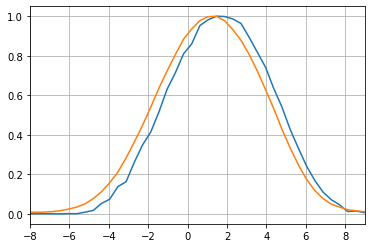

In [29]:
plt.plot(np.linspace(eV[wr],eV[-wr], len(EwEw)),np.squeeze(EwEw))
plt.plot(np.linspace(eV[wr],eV[-wr], len(EwEw)),np.squeeze(spec_in))
plt.xlim(-8,9)
plt.grid()

In [19]:
np.linspace(eV[wr],eV[-wr], len(EwEw))[np.argmax(np.squeeze(EwEw))]

1.4589235580484115

In [20]:
eV[wr:-wr][np.argmax(spec_in)]

1.246943212007199

In [21]:
np.linspace(eV[wr],eV[-wr], len(EwEw))[np.argmax(np.squeeze(EwEw))]-eV[wr:-wr][np.argmax(spec_in)]

0.2119803460412124

In [106]:
std_t = np.array(std_t)
ups_b = np.array(ups_b)
fwhms = np.array(fwhms)
fwhms_avg = np.array(fwhms_avg)
fwhms_maxs = np.array(fwhms_maxs)
fwhms2_maxs = np.array(fwhms2_maxs)
gds = np.array(gds)

ValueError: x and y must have same first dimension, but have shapes (170,) and (204,)

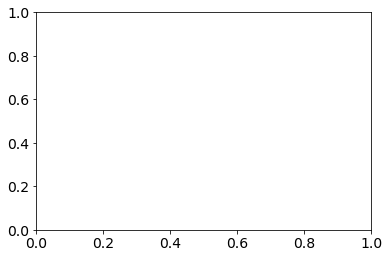

In [107]:
plt.plot(fwhms, gds, 'o', alpha = 0.7)
plt.xlabel('FWHM (fs)')
plt.ylabel('GMD (mJ)')
plt.xlim(0,1.5)
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.grid()
plt.title('Run 112')
plt.show()

plt.plot(fwhms2_maxs, gds, 'o', alpha = 0.7)
plt.xlabel('FWHM2 (fs)')
plt.ylabel('GMD (mJ)')
plt.xlim(0,1.5)
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.grid()
plt.title('Run 112 integrated maxs')
plt.show()

for u in np.unique(ups_b):
    std_thresh = 90
    plt.plot(fwhms[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()

for u in np.unique(ups_b):
    std_thresh = 90
    plt.plot(fwhms2_maxs[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM2(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()

for u in np.unique(ups_b):
    
    plt.plot(fwhms_avg[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM avg(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()

for u in np.unique(ups_b):
    
    plt.plot(fwhms_maxs[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM maxs(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()



for u in np.unique(ups_b):
    
    plt.plot(fwhms[(ups_b == u) & (std_t < std_thresh)], fwhms_maxs[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.ylabel('FWHM maxs(fs)')
plt.xlabel('FWHM (fs)')
plt.xlim(0,1.5)
plt.grid()
plt.show()


In [ ]:
plt.pcolormesh(rebin((Mt)), cmap = my_cmap)
plt.colorbar()
plt.show()
plt.pcolormesh(rebin((Mp)), cmap = my_cmap)
plt.colorbar()
plt.show()
plt.pcolormesh(rebin((Mt-Mp)), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.pcolormesh(rebin((Mt-Mp)*mask), cmap = 'bwr')
plt.colorbar()